# 연령별취업자수관계

- 국가통계포털 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터
<hr>
- 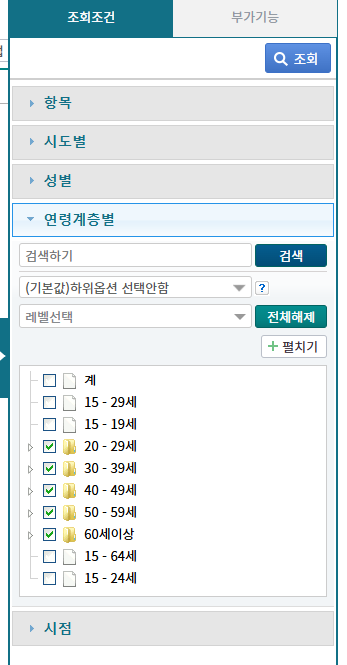 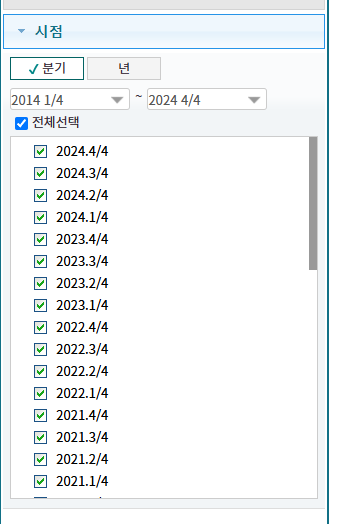 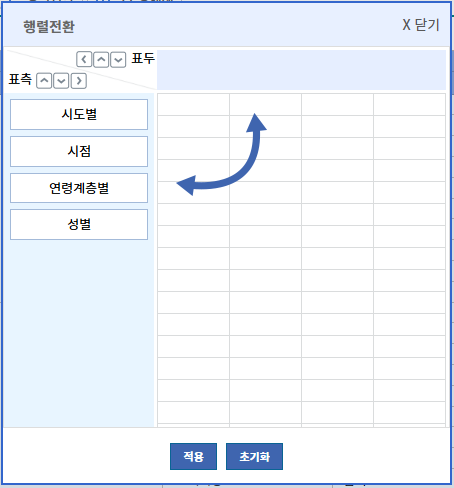

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc



In [2]:


path = 'C:\\Windows\\Fonts\\HanSantteutDotum-Regular.ttf'
font_name = fm.FontProperties(fname=path).get_name()

rc('font', family=font_name)
# plt.text(0.2,0.4,'한글', size=20)

In [3]:
file_path = './ref/행정구역시도성연령별취업자20250304.csv'

ori = pd.read_csv(file_path, encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [4]:
ex_data = ori.copy()

ex_data.columns = ['resion', 'year', 'age', 'gender', 'value']

ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [6]:
ex_data.loc[ex_data['resion']=='세종특별자치시', 'value'] = ex_data.loc[ex_data['resion']=='세종특별자치시', 'value'].replace('-','0')

In [7]:
ex_data[ex_data['resion']=='세종특별자치시']

,resion,year,age,gender,value
3080,세종특별자치시,2015.1/4,20 - 29세,남자,0
3081,세종특별자치시,2015.1/4,20 - 29세,여자,0
3082,세종특별자치시,2015.1/4,30 - 39세,남자,0
3083,세종특별자치시,2015.1/4,30 - 39세,여자,0
3084,세종특별자치시,2015.1/4,40 - 49세,남자,0
...,...,...,...,...,...
3475,세종특별자치시,2024.4/4,40 - 49세,여자,26
3476,세종특별자치시,2024.4/4,50 - 59세,남자,27
3477,세종특별자치시,2024.4/4,50 - 59세,여자,19
3478,세종특별자치시,2024.4/4,60세이상,남자,19


In [28]:
ex_data['value'] = ex_data['value'].astype(int)
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name='total')

ex2_data = ex_data.groupby(['year', 'gender'])['value'].sum().reset_index(name='total')

# ex_data_m = ex_data.loc[ex_data['gender'] == '남자']
# ex_data_w = ex_data.loc[ex_data['gender'] == '여자']
# ex_data_m = ex_data_m.groupby('year')['value'].sum().reset_index(name='total')
# ex_data_w = ex_data_w.groupby('year')['value'].sum().reset_index(name='total')

In [9]:
ex2_data

,year,gender,total
0,2014.1/4,남자,14650
1,2014.1/4,여자,10305
2,2014.2/4,남자,15027
3,2014.2/4,여자,10839
4,2014.3/4,남자,15088
...,...,...,...
83,2024.2/4,여자,12716
84,2024.3/4,남자,15945
85,2024.3/4,여자,12737
86,2024.4/4,남자,15868


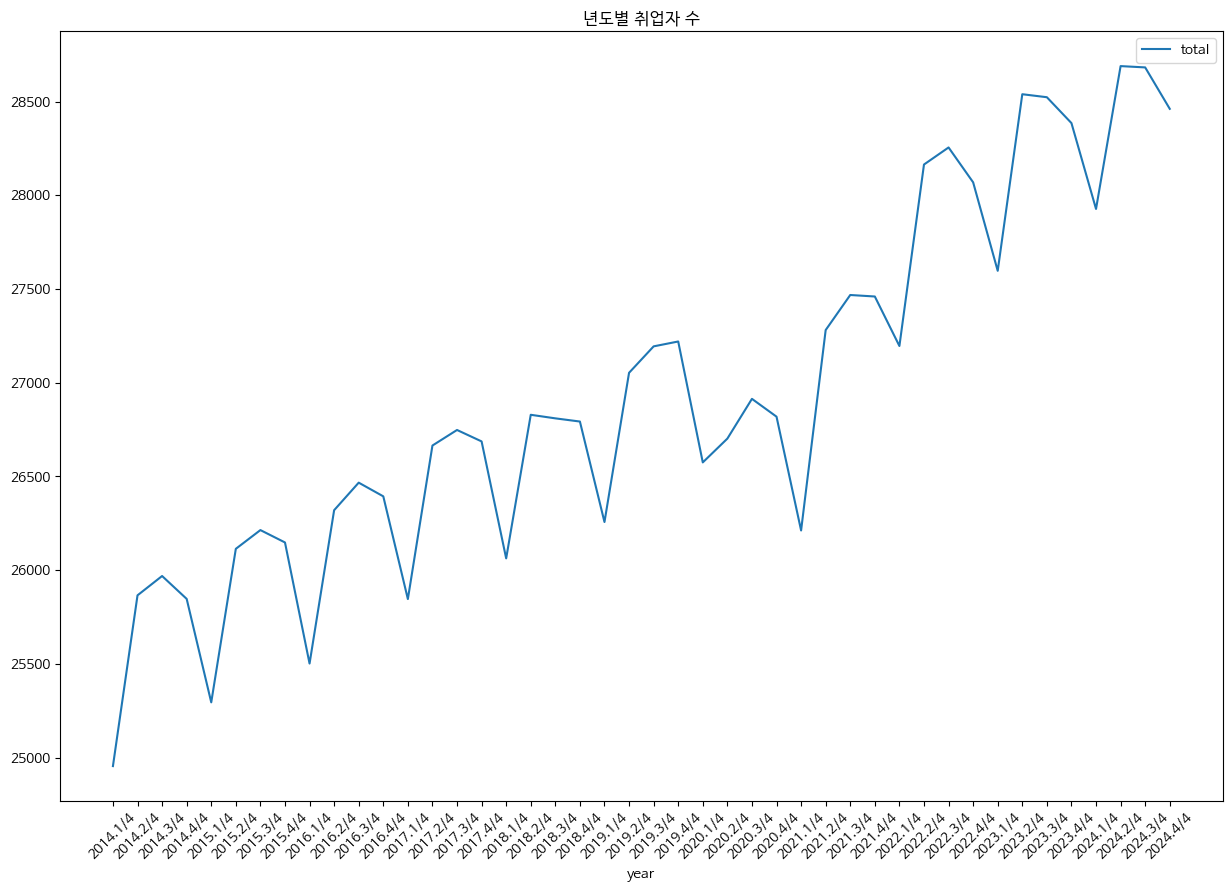

In [26]:
ax = ex1_data.plot(x='year', y='total', figsize=(15,10), title="년도별 취업자 수")
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data['year'],rotation=45)
plt.show()

In [29]:
# ax = ex_data_m.plot(x='year', y='total', figsize=(12,8), title="년도별 취업자 수")
# ax.set_xticks(range(len(ex_data_m)))
# ax.set_xticklabels(ex_data_m['year'],rotation=45)
# plt.show()

# ax = ex_data_w.plot(x='year', y='total', figsize=(12,8), title="년도별 취업자 수")
# ax.set_xticks(range(len(ex_data_w)))
# ax.set_xticklabels(ex_data_w['year'],rotation=45)
# plt.show()

In [30]:
filter_m = ex2_data['gender']=='남자'
filter_w = ex2_data['gender']=='여자'

In [31]:
male = ex2_data[filter_m]
female = ex2_data[filter_w]

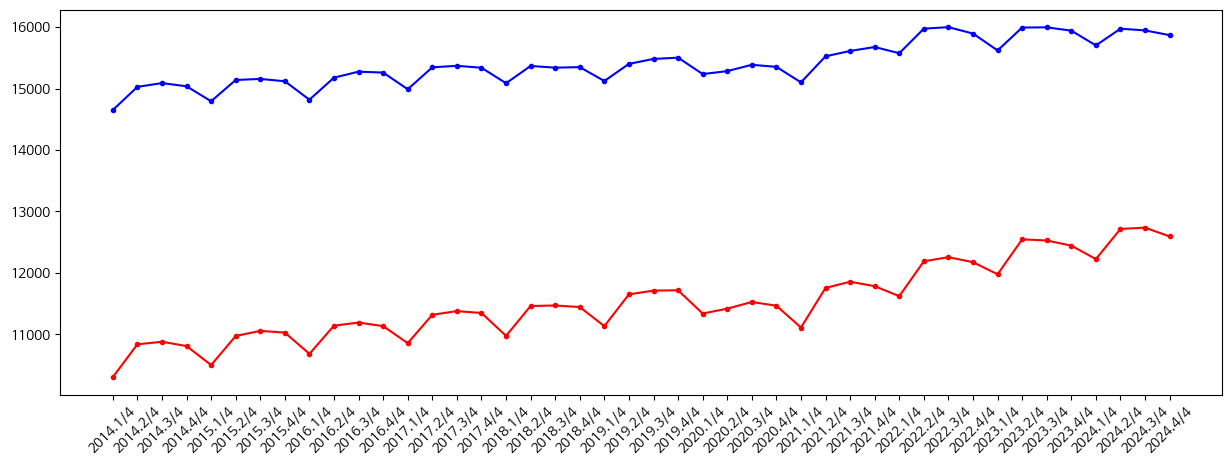

In [32]:
plt.figure(figsize=(15,5))
plt.plot(male['year'], male['total'], label='남자', color='blue', linestyle='-', marker='.')
plt.plot(female['year'], female['total'], label='여자', color='red', linestyle='-', marker='.')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'], rotation = 45)
plt.show()

In [15]:
arr_resion = list(set(ex_data['resion']))
arr_resion

['전라남도',
 '울산광역시',
 '강원도',
 '세종특별자치시',
 '경상북도',
 '경상남도',
 '충청남도',
 '대전광역시',
 '충청북도',
 '제주도',
 '대구광역시',
 '부산광역시',
 '경기도',
 '서울특별시',
 '광주광역시',
 '전라북도',
 '인천광역시']

In [16]:
ex_data['value'] = ex_data['value'].astype(int)
ex3_data = ex_data.groupby(['resion'])['value'].sum().reset_index(name='total')
# ex3_data = ex_data.groupby(['resion', 'gender'])['value'].sum().reset_index(name='total')
ex3_data

,resion,total
0,강원도,34616
1,경기도,303811
2,경상남도,75520
3,경상북도,63011
4,광주광역시,32635
5,대구광역시,53606
6,대전광역시,33927
7,부산광역시,73294
8,서울특별시,224277
9,세종특별자치시,5684


<Figure size 1500x1000 with 0 Axes>

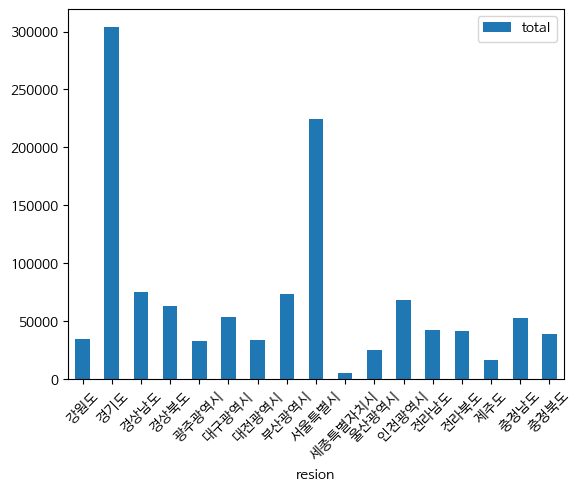

In [17]:
plt.figure(figsize=(15,10))
ex3_data.plot.bar(x='resion', y='total')
# plt.bar(ex3_data, ex3_data['total'])
plt.xticks(rotation = 45)
plt.show()

In [18]:
ex3_data.sort_values('total', ascending=False)

,resion,total
1,경기도,303811
8,서울특별시,224277
2,경상남도,75520
7,부산광역시,73294
11,인천광역시,68506
3,경상북도,63011
5,대구광역시,53606
15,충청남도,52483
12,전라남도,42789
13,전라북도,41185


In [19]:
ex4_data = ex_data.groupby(['year', 'resion'])['value'].sum().reset_index(name='total')
ex4_data

,year,resion,total
0,2014.1/4,강원도,648
1,2014.1/4,경기도,6016
2,2014.1/4,경상남도,1634
3,2014.1/4,경상북도,1368
4,2014.1/4,광주광역시,709
...,...,...,...
739,2024.4/4,전라남도,993
740,2024.4/4,전라북도,971
741,2024.4/4,제주도,397
742,2024.4/4,충청남도,1286


In [33]:
te1 = ex4_data[ex4_data['resion'] == '경기도']
te2 = ex4_data[ex4_data['resion'] == '서울특별시']
te3 = ex4_data[ex4_data['resion'] == '경상남도']
te4 = ex4_data[ex4_data['resion'] == '부산광역시']
te5 = ex4_data[ex4_data['resion'] == '울산광역시']



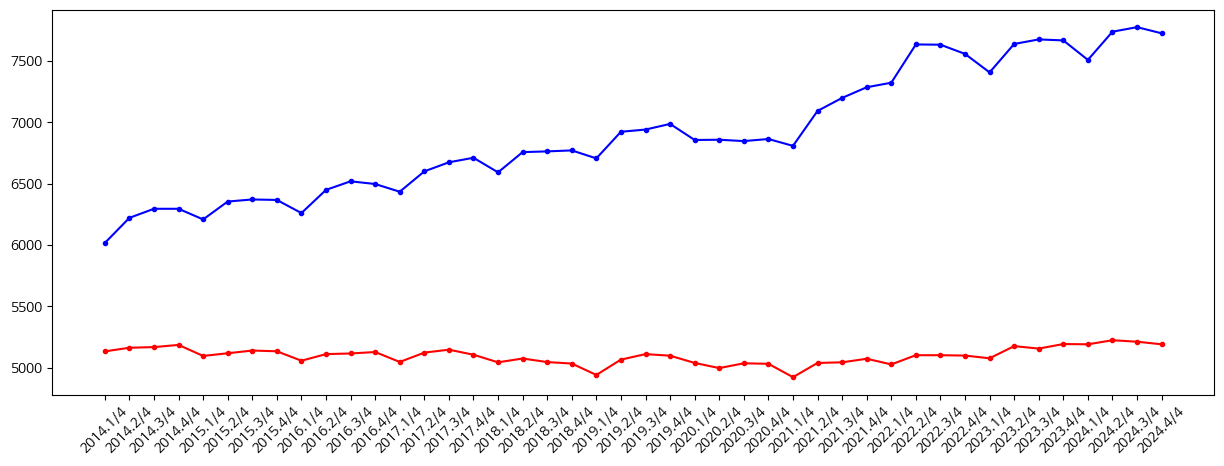

In [38]:
plt.figure(figsize=(15,5))
plt.plot(te1['year'], te1['total'], label='경기도', color='blue', linestyle='-', marker='.')
plt.plot(te2['year'], te2['total'], label='서울특별시', color='red', linestyle='-', marker='.')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'], rotation = 45)
plt.show()

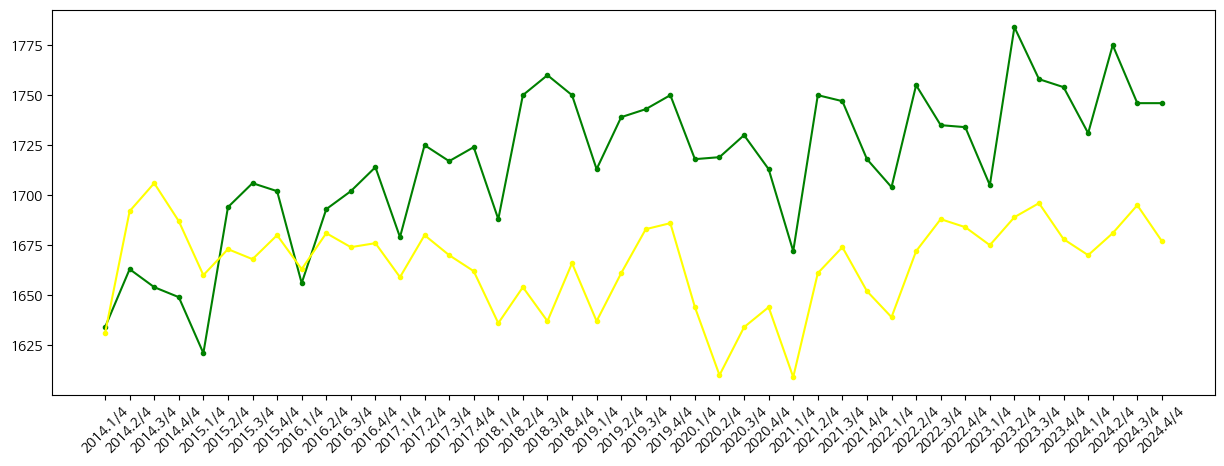

In [35]:
plt.figure(figsize=(15,5))
plt.plot(te3['year'], te3['total'], label='경상남도', color='green', linestyle='-', marker='.')
plt.plot(te4['year'], te4['total'], label='부산광역시', color='yellow', linestyle='-', marker='.')
# plt.plot(te5['year'], te5['total'], label='울산광역시', color='orange', linestyle='-', marker='.')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'], rotation = 45)
plt.show()

- 코로나 초기를 제외하고 취업자 수는 매년 증가하고 있으며 최근 여성 취업자가 소폭 높은 증가세를 보임
- 수도권의 취업자가 다른 지역에 비해 매우 높게 나타나고 있으며 이를 통해 수도권에 상당수의 일자리가 분포하고 있다고 보여진다.

- 서울의 취업자 수도 많이 늘어나고 있지만 서울 주변의 경기도에서 매우 높은 증가폭을 보이는 것을 알 수 있다.
- 또한, 부산과 주변의 경상남도와 비교했을때 경상남도의 증가폭이 더 높은것이 보여진다.
- 이를 통해 광역시와 같은 도시보다 주변 지역에서 더 많은 일자리가 생성되는것을 대략적으로 확인할 수 있다.

In [5]:
ex5_data = ori.copy()


ex5_data.loc[:,'데이터'] = ex5_data['데이터'].replace('-',0).astype(int)
filter0 = (ex5_data['시점']>="2018.1/4") & (ex5_data['시점'] < "2019.1/4")


In [6]:
ex5_data = ex5_data[filter0]

ex5_data.head()

,시도별,시점,연령계층별,성별,데이터
160,서울특별시,2018.1/4,20 - 29세,남자,339
161,서울특별시,2018.1/4,20 - 29세,여자,477
162,서울특별시,2018.1/4,30 - 39세,남자,693
163,서울특별시,2018.1/4,30 - 39세,여자,513
164,서울특별시,2018.1/4,40 - 49세,남자,719


In [7]:

x_data = ex5_data[ex5_data['연령계층별'].isin(['20 - 29세'])]
y_data = ex5_data[ex5_data['연령계층별'].isin(['60세이상'])]

# x_data = ex5_data.loc[ex5_data['연령계층별'] == '20 - 29세']
# y_data = ex5_data.loc[ex5_data['연령계층별'] == '60세이상']


In [8]:

x = x_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') # 20대 취업자
y = y_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') # 60대(정년퇴임) 취업
z = ex5_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') 

In [9]:
import numpy as np

regions = list(x.index)
# regions = list(x['시도별'])
# regions = list(set(x['시도별']))
color = [np.random.rand(3,) for _ in range(len(regions))] # 랜덤색상

color

z = np.array(z, dtype=float)

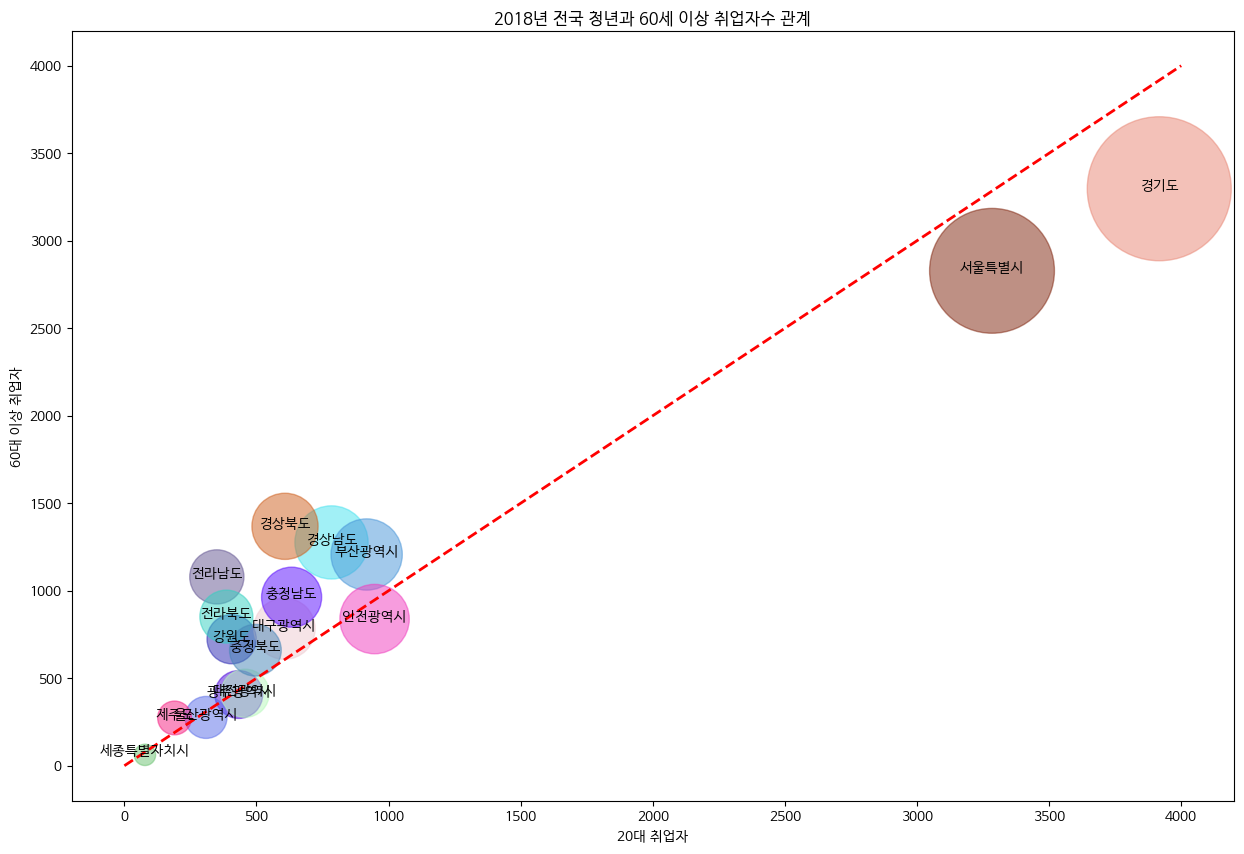

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(x,y, s=z*0.4, c=color, alpha=0.5)

for i in range(len(regions)):
    ax.annotate(regions[i],xy=(x.iloc[i], y.iloc[i]), ha="center")
ax.set_title('2018년 전국 청년과 60세 이상 취업자수 관계')
ax.set_xlabel('20대 취업자')
ax.set_ylabel('60대 이상 취업자')
# plt.xlabel('20대 취업자')
# plt.ylabel('60대 이상 취업자')

ax.plot([0,4000], [0,4000], color='r', linestyle="--", linewidth=2)

plt.show()

In [11]:
data_2024 = ori.copy()

data_2024.loc[:,'데이터'] = data_2024['데이터'].replace('-',0).astype(int)
data_2024 = data_2024.loc[(data_2024['시점']>="2024.1/4") & (data_2024['시점'] <= "2024.4/4")]
data_2024

,시도별,시점,연령계층별,성별,데이터
400,서울특별시,2024.1/4,20 - 29세,남자,366
401,서울특별시,2024.1/4,20 - 29세,여자,518
402,서울특별시,2024.1/4,30 - 39세,남자,635
403,서울특별시,2024.1/4,30 - 39세,여자,571
404,서울특별시,2024.1/4,40 - 49세,남자,617
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [12]:
a = data_2024.loc[data_2024['연령계층별'] == '20 - 29세']
b = data_2024.loc[data_2024['연령계층별'] == '60세이상']

a = a.groupby(['시도별'])['데이터'].sum()
b = b.groupby(['시도별'])['데이터'].sum()
t = data_2024.groupby(['시도별'])['데이터'].sum()

t = np.array(t, dtype=float)

In [13]:
region = list(a.index)

color = [np.random.rand(3,) for _ in range(len(region))]
color

[array([0.36661613, 0.50303974, 0.10047783]),
 array([0.19105453, 0.33405835, 0.08008047]),
 array([0.65346636, 0.70580423, 0.32168724]),
 array([0.22456498, 0.06645483, 0.71217943]),
 array([0.71359172, 0.14168696, 0.59009202]),
 array([0.2614306 , 0.49577413, 0.82941052]),
 array([0.68247963, 0.46994658, 0.20399798]),
 array([0.07398644, 0.97766263, 0.43006317]),
 array([0.13061438, 0.26606948, 0.33298285]),
 array([0.2566635 , 0.39869824, 0.00812365]),
 array([0.42115106, 0.27610683, 0.66432774]),
 array([0.55435903, 0.06771742, 0.11748144]),
 array([0.81610484, 0.16103636, 0.37557491]),
 array([0.64145276, 0.5235585 , 0.99169342]),
 array([0.29094709, 0.11668187, 0.25506927]),
 array([0.45048458, 0.3312789 , 0.59551794]),
 array([0.45457842, 0.70947725, 0.63597915])]

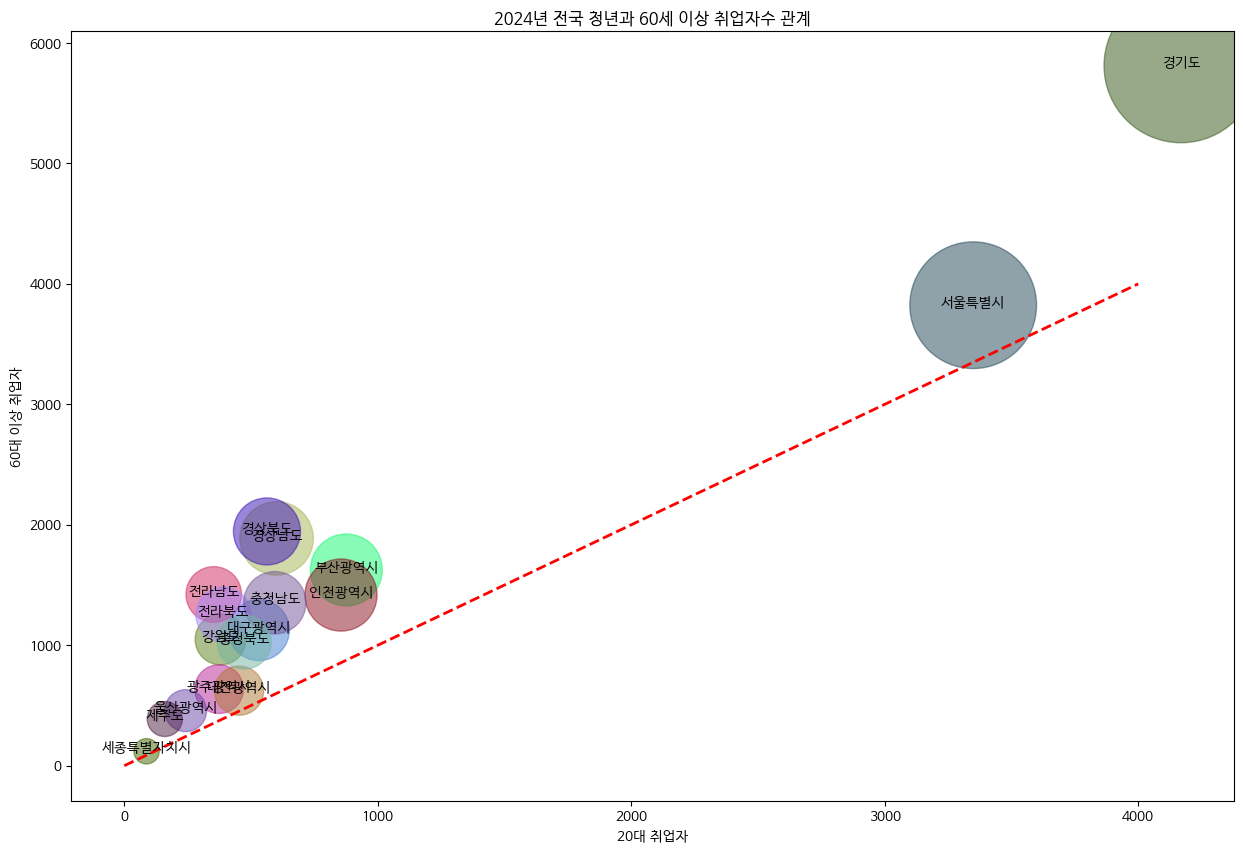

In [14]:


fig, ax = plt.subplots(figsize=(15,10))

scatter = ax.scatter(a,b, s=t*0.4, c=color, alpha=0.5)

for i in range(len(regions)):
    ax.annotate(regions[i],xy=(a.iloc[i], b.iloc[i]), ha="center")
ax.set_title('2024년 전국 청년과 60세 이상 취업자수 관계')
ax.set_xlabel('20대 취업자')
ax.set_ylabel('60대 이상 취업자')


ax.plot([0,4000], [0,4000], color='r', linestyle="--", linewidth=2)

plt.show()

In [15]:
ori

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [50]:
from prophet import Prophet

exf_data = ori.copy()
exf_data.loc[:,'데이터'] = exf_data['데이터'].replace('-',0).astype(int)
exf_data = exf_data.groupby(['시점'])['데이터'].sum().reset_index()

for k in range(len(exf_data)):
    exf_data.loc[k,'시점'] = exf_data.loc[k,'시점'].replace('1/4','1').replace('2/4','4').replace('3/4','7').replace('4/4','10')

exf_data['시점'] = pd.to_datetime(exf_data['시점'], format='%Y.%m')
exf_data = exf_data.rename(columns={'시점':'ds', '데이터':'y'})
exf_data

,ds,y
0,2014-01-01,24955
1,2014-04-01,25866
2,2014-07-01,25969
3,2014-10-01,25847
4,2015-01-01,25295
5,2015-04-01,26114
6,2015-07-01,26214
7,2015-10-01,26148
8,2016-01-01,25502
9,2016-04-01,26320


In [51]:
m = Prophet()
m.fit(exf_data)

13:06:36 - cmdstanpy - INFO - Chain [1] start processing
13:06:36 - cmdstanpy - INFO - Chain [1] done processing


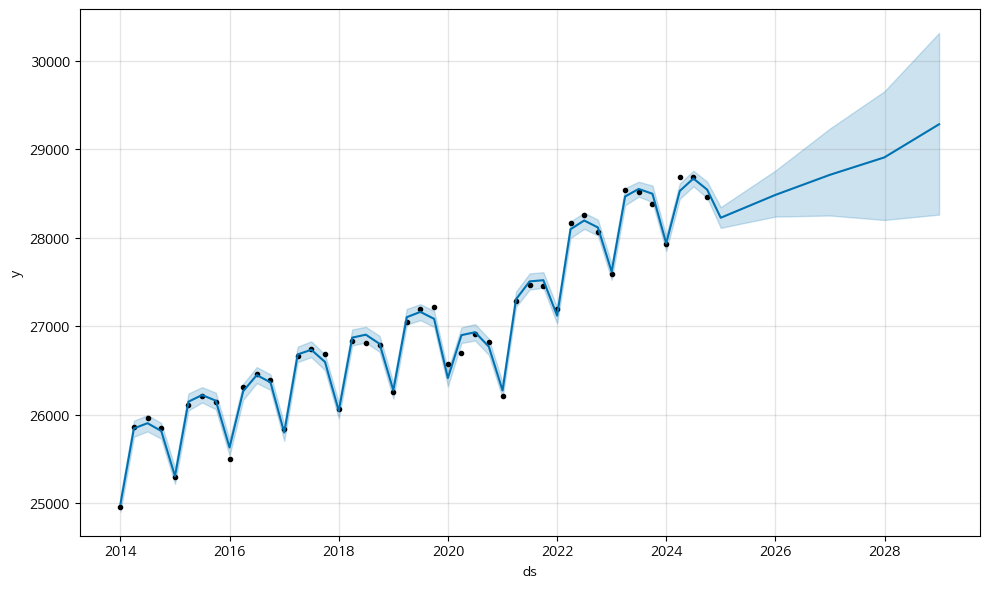

In [52]:
future = m.make_future_dataframe(periods=5, freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig('./chart/전체_취업_q.png')
plt.show()

In [53]:
exf_data20 = ori.copy()
exf_data20 = exf_data20.loc[exf_data20['연령계층별'] == '20 - 29세']
exf_data20.loc[:,'데이터'] = exf_data20['데이터'].replace('-',0).astype(int)
exf_data20 = exf_data20.groupby(['시점'])['데이터'].sum().reset_index()

for k in range(len(exf_data20)):
    exf_data20.loc[k,'시점'] = exf_data20.loc[k,'시점'].replace('1/4','1').replace('2/4','4').replace('3/4','7').replace('4/4','10')

exf_data20['시점'] = pd.to_datetime(exf_data20['시점'], format='%Y.%m')
exf_data20 = exf_data20.rename(columns={'시점':'ds', '데이터':'y'})
exf_data20

,ds,y
0,2014-01-01,3507
1,2014-04-01,3547
2,2014-07-01,3608
3,2014-10-01,3570
4,2015-01-01,3549
5,2015-04-01,3624
6,2015-07-01,3658
7,2015-10-01,3654
8,2016-01-01,3582
9,2016-04-01,3697


In [54]:
m = Prophet()
m.fit(exf_data20)

13:07:10 - cmdstanpy - INFO - Chain [1] start processing
13:07:10 - cmdstanpy - INFO - Chain [1] done processing


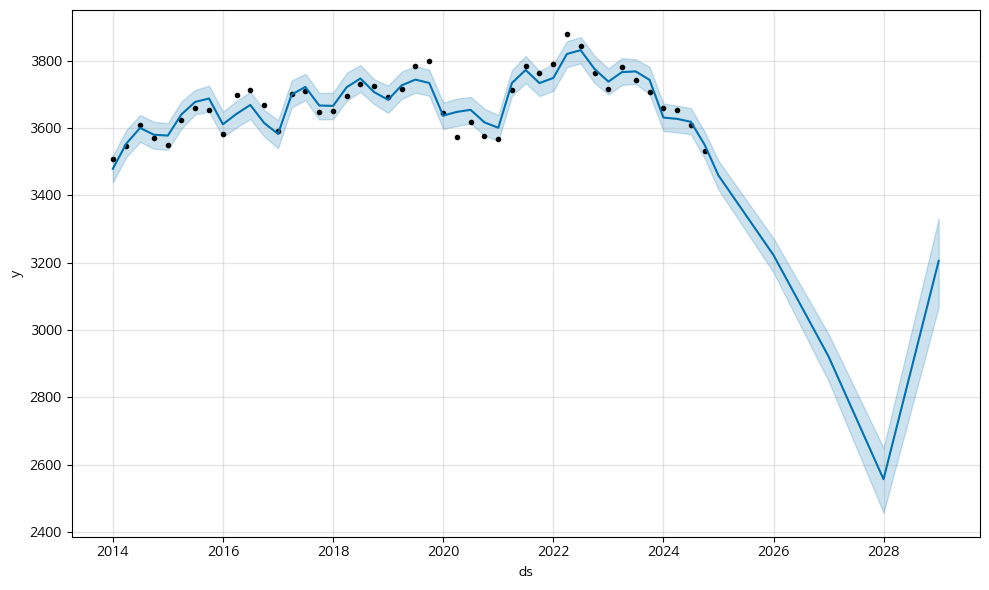

In [60]:
future = m.make_future_dataframe(periods=5, freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig('./chart/20대_취업_2.png')
plt.show()

In [35]:
exf_data60 = ori.copy()
exf_data60 = exf_data60.loc[exf_data60['연령계층별'] == '60세이상']
exf_data60.loc[:,'데이터'] = exf_data60['데이터'].replace('-',0).astype(int)
exf_data60 = exf_data60.groupby(['시점'])['데이터'].sum().reset_index()

for k in range(len(exf_data60)):
    exf_data60.loc[k,'시점'] = exf_data60.loc[k,'시점'].replace('1/4','1').replace('2/4','4').replace('3/4','7').replace('4/4','10')

exf_data60['시점'] = pd.to_datetime(exf_data60['시점'], format='%Y.%m')
exf_data60 = exf_data60.rename(columns={'시점':'ds', '데이터':'y'})
exf_data60

,ds,y
0,2014-01-01,3043
1,2014-04-01,3596
2,2014-07-01,3632
3,2014-10-01,3526
4,2015-01-01,3237
5,2015-04-01,3757
6,2015-07-01,3814
7,2015-10-01,3704
8,2016-01-01,3419
9,2016-04-01,3944


In [36]:
m = Prophet()
m.fit(exf_data60)

12:20:40 - cmdstanpy - INFO - Chain [1] start processing
12:20:40 - cmdstanpy - INFO - Chain [1] done processing


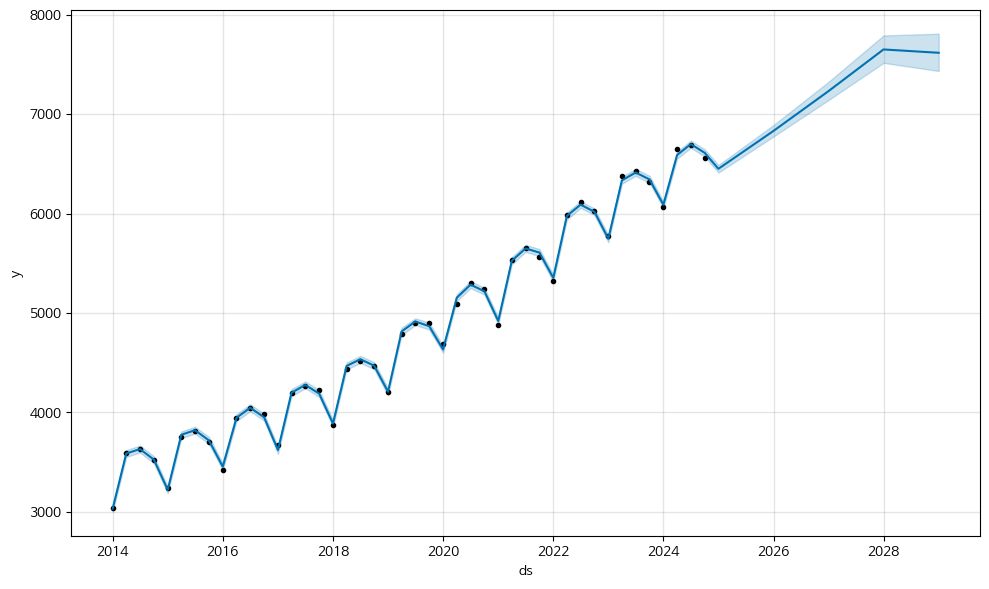

In [37]:
future = m.make_future_dataframe(periods=5, freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig('./chart/60대_취업_1.png')
plt.show()